## Questions around our power data
+ how has our consumption changed over the past few months?
+ which day of week are we using the most power?
+ which time of day are we using most power?
+ how does billing rate change


In [97]:
import pandas as pd
import matplotlib as plt
import numpy as np
%matplotlib inline  

# read data to pandas dataframe
PowerData = pd.read_csv(
    'pge_electric_interval_data_6078550200_2017-05-01_to_2017-12-21.csv', 
    skiprows=5,
    parse_dates=['DATE']
    )

# add weekday
PowerData['WeekDay'] = PowerData['DATE'].dt.weekday_name

# remove dollar sign and ensure cost is float
PowerData['COST(USD)'] = PowerData['COST'].str.replace('$','').astype(float)

# rename usage to include units (kWh)
PowerData = PowerData.rename(index=str, columns={"USAGE": "USAGE(kWh)"})

# add month name
PowerData['MONTH'] = PowerData.DATE.dt.month

PowerData.head()

,TYPE,DATE,START TIME,END TIME,USAGE(kWh),UNITS,COST,NOTES,WeekDay,COST(USD),MONTH
0,Electric usage,2017-05-01,00:00,00:59,0.15,kWh,$0.03,NaN,Monday,0.03,5
1,Electric usage,2017-05-01,01:00,01:59,0.14,kWh,$0.03,NaN,Monday,0.03,5
2,Electric usage,2017-05-01,02:00,02:59,0.08,kWh,$0.02,NaN,Monday,0.02,5
3,Electric usage,2017-05-01,03:00,03:59,0.21,kWh,$0.04,NaN,Monday,0.04,5
4,Electric usage,2017-05-01,04:00,04:59,0.34,kWh,$0.07,NaN,Monday,0.07,5


In [98]:
PowerData.shape

(5589, 11)

In [99]:
# check for changes in rate paid
pivot1 = PowerData.pivot_table(
    values=['USAGE(kWh)', 'COST(USD)'], 
    index='MONTH',
    aggfunc='sum')

pivot1['RATE($/kWh)'] = pivot1['COST(USD)'] / pivot1['USAGE(kWh)']

pivot1

,COST(USD),USAGE(kWh),RATE($/kWh)
MONTH,,,
5,52.43,249.72,0.209955
6,42.85,214.23,0.200019
7,47.74,239.42,0.199399
8,83.76,373.35,0.224347
9,91.67,387.28,0.236702
10,103.79,419.68,0.247307
11,109.44,496.79,0.220294
12,118.26,449.26,0.263233


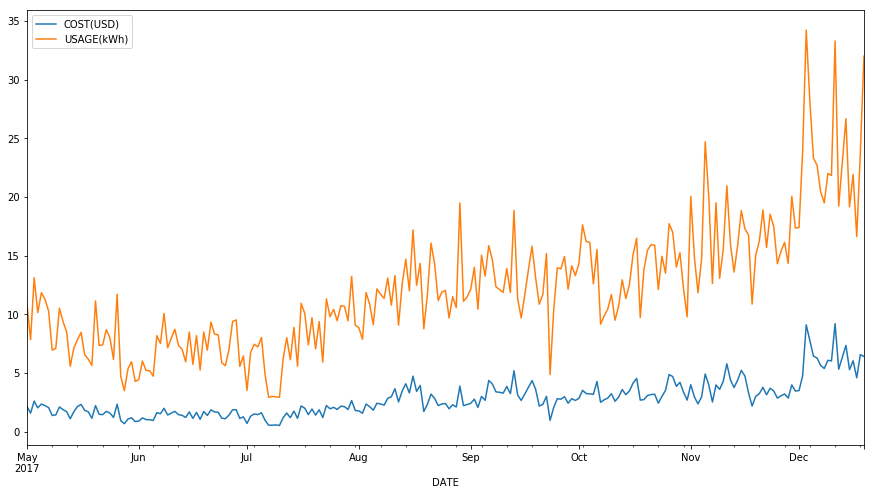

In [100]:
# plot cost and usage over time series
pivot2 = PowerData.pivot_table(
    values=['USAGE(kWh)', 'COST(USD)'], 
    index='DATE', 
    aggfunc='sum')

pivot2.plot(figsize=(15, 8))

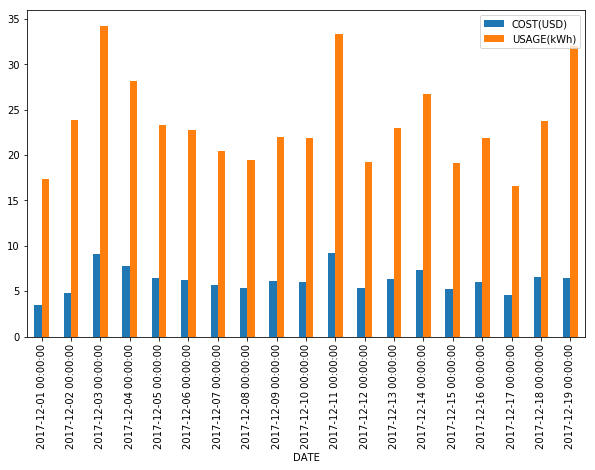

In [101]:
# look closer at December
pivot2.loc['20171201':'20171231'].plot.bar(figsize=(10, 6))

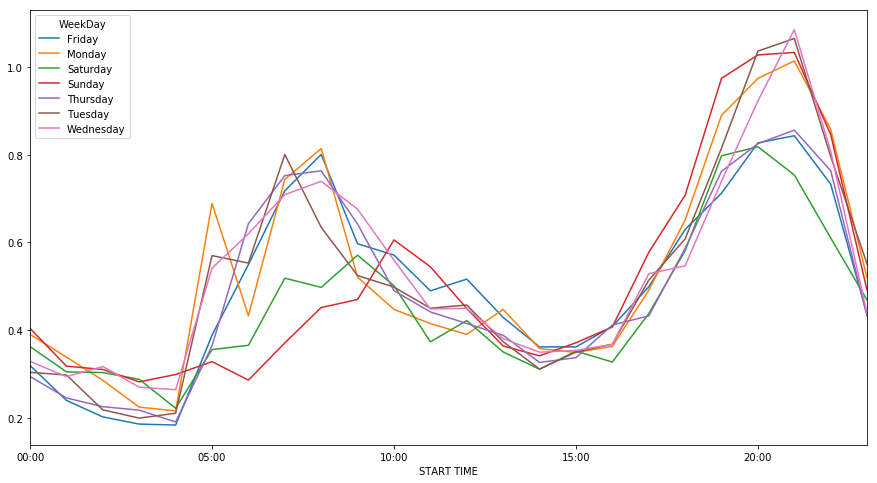

In [102]:
# plot by day (average)
pivot3 = PowerData.pivot_table(
    values='USAGE(kWh)', 
    index='START TIME', 
    columns = 'WeekDay')

pivot3.plot(figsize=(15, 8))

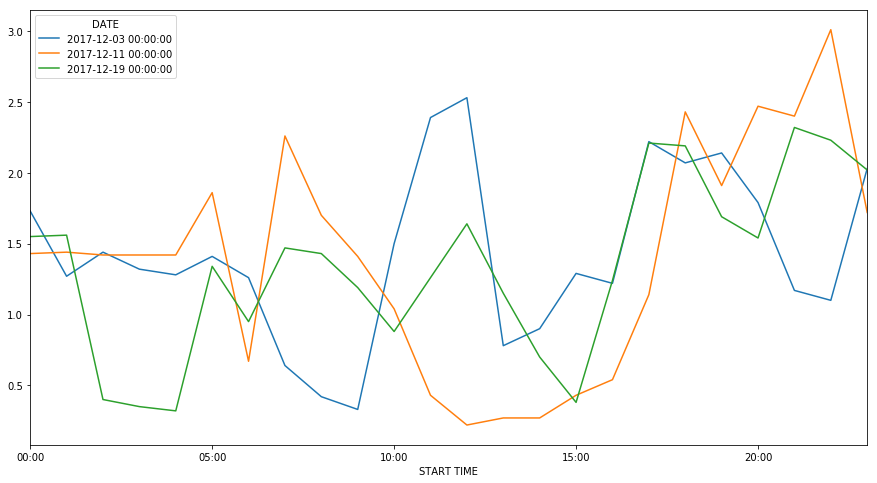

In [103]:
# plot the three ridiculous peak days
# figure out how to do this.

outlier_days = PowerData[(PowerData.DATE == '20171203') | 
                         (PowerData.DATE == '20171211') | 
                         (PowerData.DATE == '20171219')]

pivot4 = outlier_days.pivot_table(
    values='USAGE(kWh)', 
    index='START TIME', 
    columns = 'DATE'
    )

pivot4.plot(figsize=(15, 8))




